In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
path = "./csse_covid_19_daily_reports/"
path2 = "./csse_covid_19_time_series/"


In [14]:
df = pd.read_csv(path+'03-22-2020.csv')
df = df.groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head(n=10)
topten = list(df.index)

for i, n in enumerate(topten):
    if 'Korea' in n:
        topten[i]='Korea'
        
topten.append('Canada')
topten

['Italy',
 'China',
 'Spain',
 'Iran',
 'France',
 'US',
 'United Kingdom',
 'Netherlands',
 'Korea',
 'Switzerland',
 'Canada']

death ratio: 0.09259697656329263


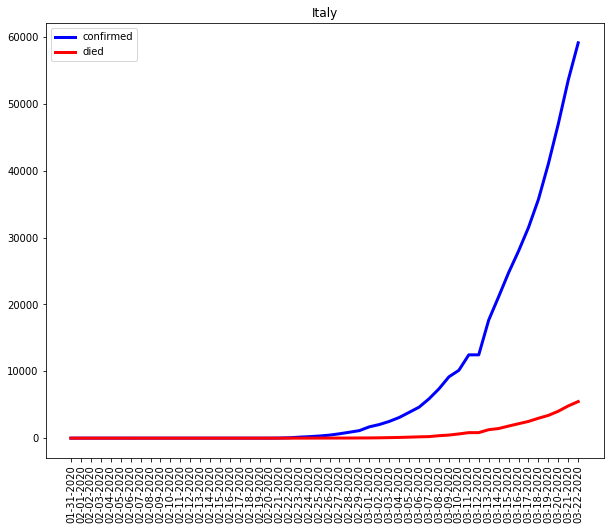

warning, 2 countries detected at 03-11-2020
warning, 2 countries detected at 03-12-2020
death ratio: 0.040112043441404475


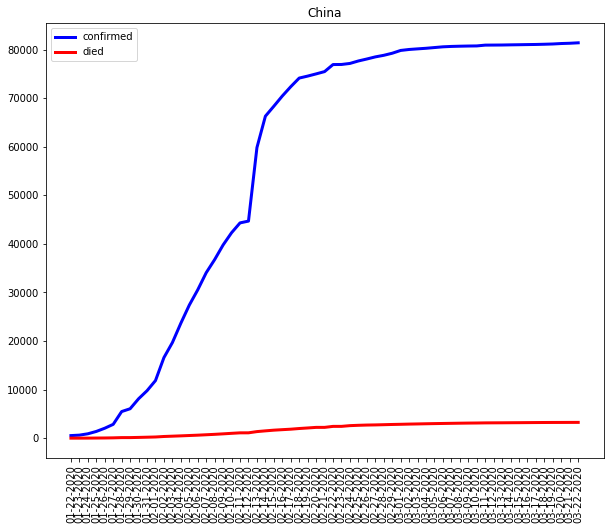

death ratio: 0.06159621802002225


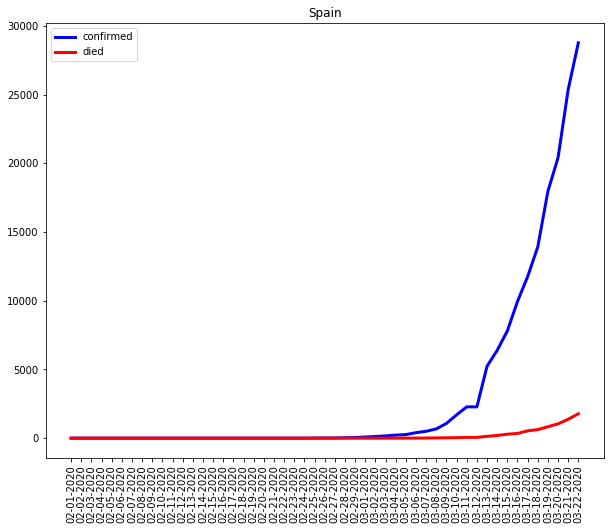

death ratio: 0.0778722617617155


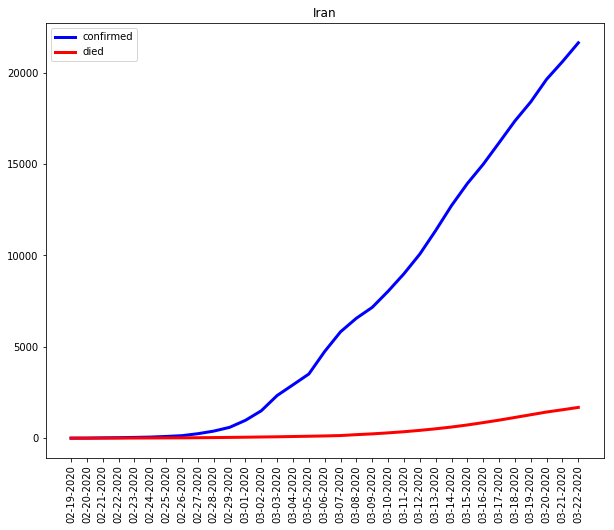

death ratio: 0.042009473946646725


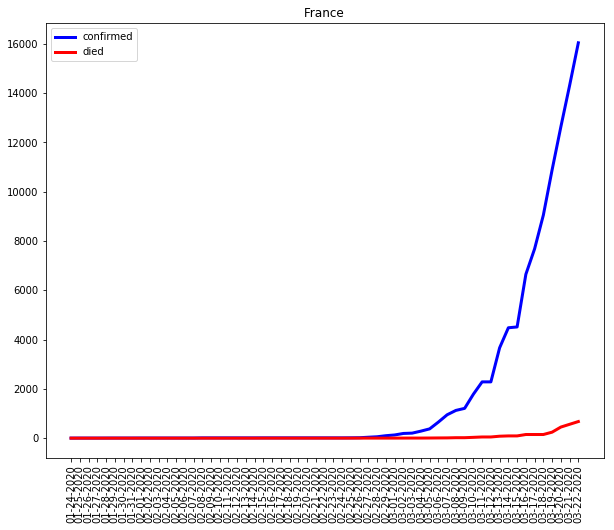

death ratio: 0.012531554273350162


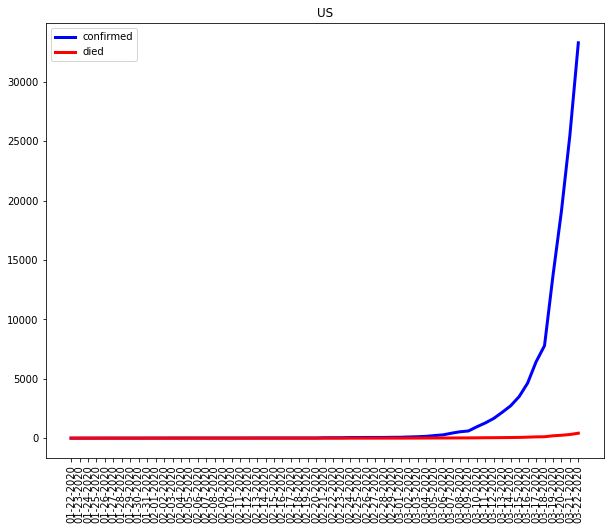

death ratio: 0.049120362306218426


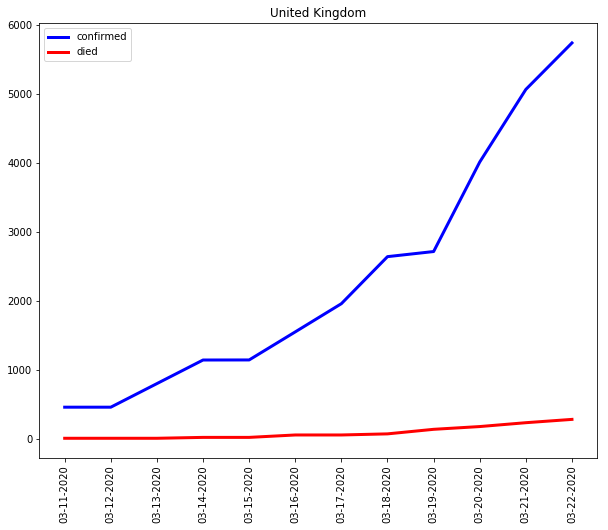

death ratio: 0.04269449715370019


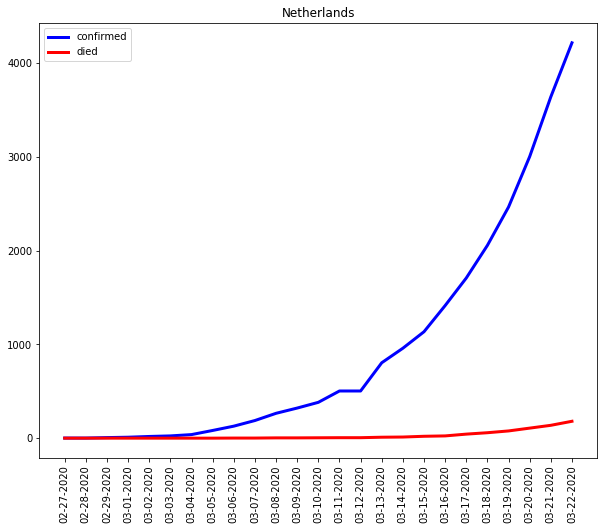

death ratio: 0.011689333483196583


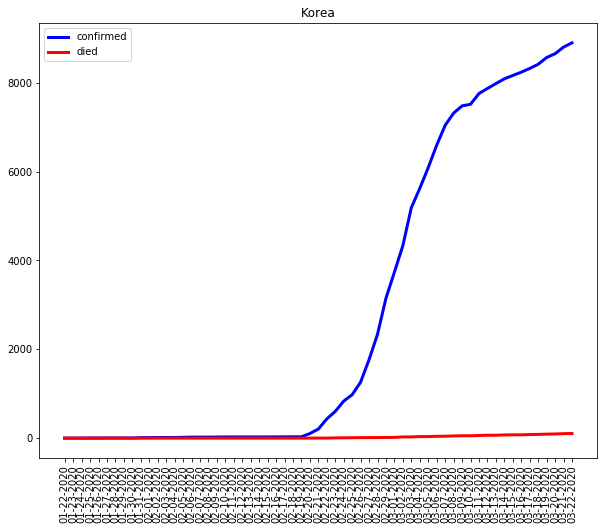

death ratio: 0.01352657004830918


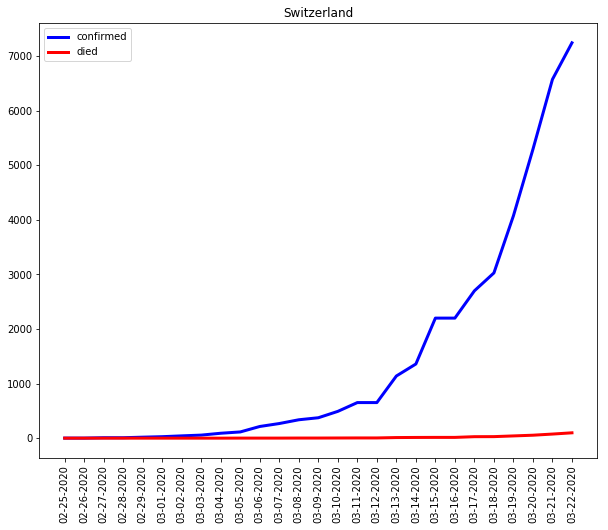

death ratio: 0.014334470989761093


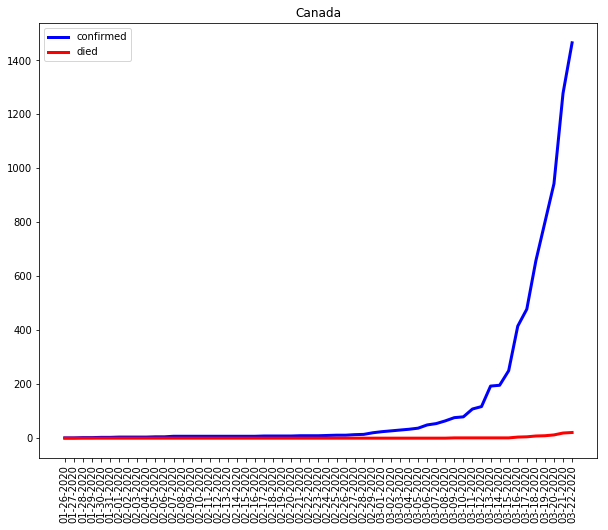

In [15]:
files = glob.glob(path+'*.csv')

for c in topten:
    country=c
    main_df = pd.DataFrame()
    dates = []
    for f in files:
        df = pd.read_csv(f)
        date = f[-14:-4]

        def country_search(string):
            if country in string:
                return 1
            else:
                return 0

        df[country] = df['Country/Region'].apply(country_search)

        df = df[df[country]==1]

        if len(df)>0:
            dates.append(date)

        df_outcome = df[['Country/Region','Confirmed', 'Deaths','Recovered']]
        df_outcome = df_outcome.groupby('Country/Region').sum()
        if len(df_outcome) > 1:
            print('warning, {0} countries detected at {1}'.format(len(df_outcome), date))
            df_outcome = df_outcome.iloc[0:1]

        df_outcome['Removed'] = df_outcome['Deaths'] + df_outcome['Recovered']
        df_outcome['Infectious'] = df_outcome['Confirmed'] - df_outcome['Removed']
        df_outcome['death_ratio'] = df_outcome['Deaths']/df_outcome['Confirmed']



        main_df = main_df.append(df_outcome)
    #     main_df = df_outcome.set_index(date)
    #     break

    indexx = pd.Series(dates)
    main_df = main_df.set_index(indexx)

#     death / recovered
    print('death ratio: {}'.format(df_outcome.iloc[-1][-1]))

    plt.figure(figsize=(10,8))
    width=3
    plt.plot(main_df['Confirmed'], c='b', label = 'confirmed', linewidth=width)
#     plt.plot(main_df['Recovered'], c='g', label = 'recovered', linewidth=width)
    plt.plot(main_df['Deaths'], c='r', label = 'died', linewidth=width)
#     plt.plot(main_df['Infectious'], c='y', label = 'currently infectious', linewidth=width)
    plt.xticks(rotation = 90)
    plt.title(country)
    plt.legend(loc='upper left')
    plt.show()

In [23]:
timeser = pd.read_csv(path2 + 'time_series_19-covid-Deaths.csv')
timeser = timeser.groupby('Country/Region').sum()

In [49]:
top20 = timeser.sort_values(timeser.columns[-1], ascending=False).head(n=20)
top20 = top20.index
top20

Index(['Italy', 'China', 'Spain', 'Iran', 'France', 'US', 'United Kingdom',
       'Netherlands', 'Korea, South', 'Switzerland', 'Germany', 'Belgium',
       'Indonesia', 'Japan', 'Turkey', 'Brazil', 'Philippines', 'Sweden',
       'Canada', 'Iraq'],
      dtype='object', name='Country/Region')

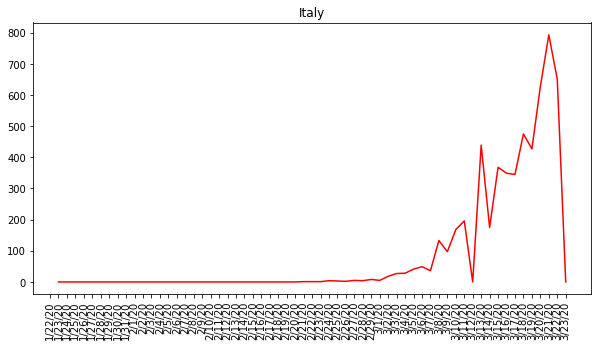

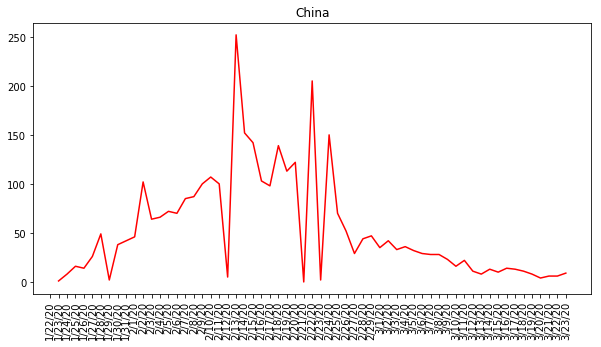

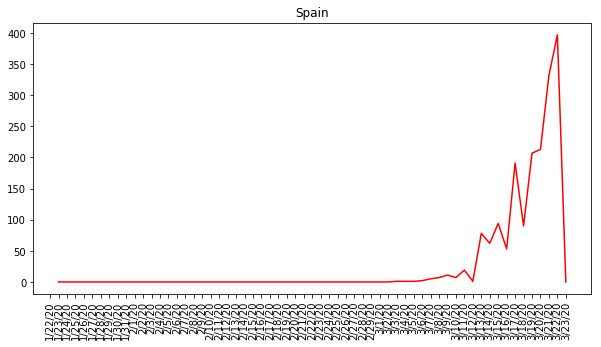

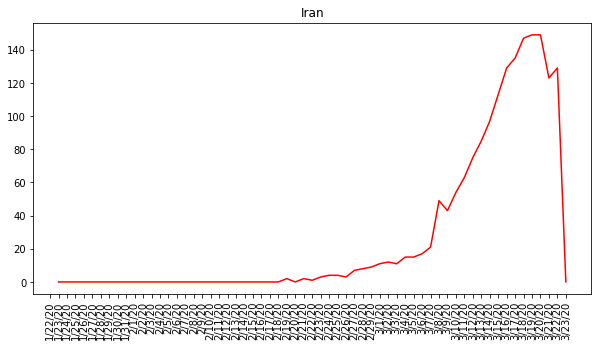

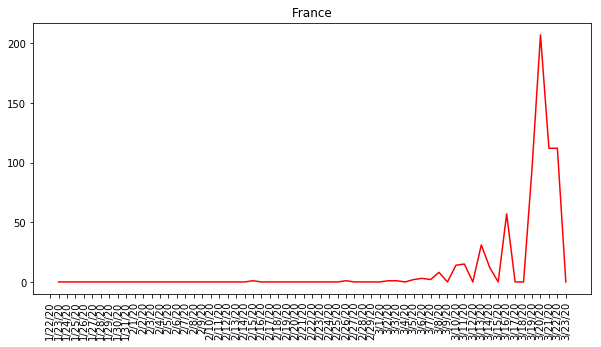

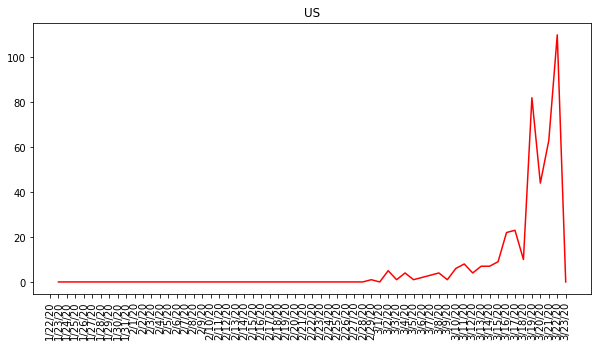

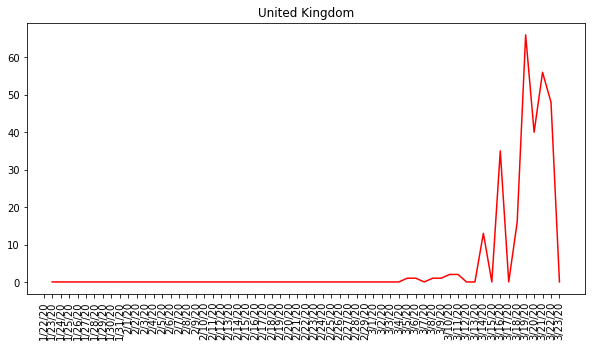

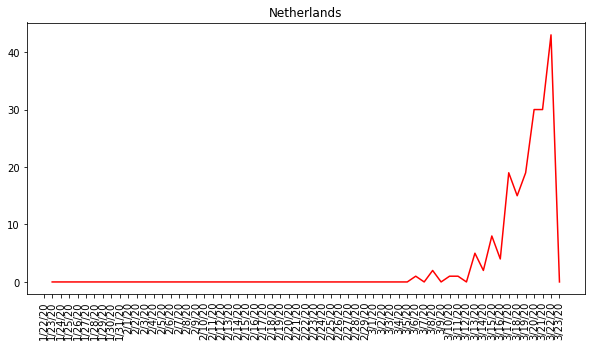

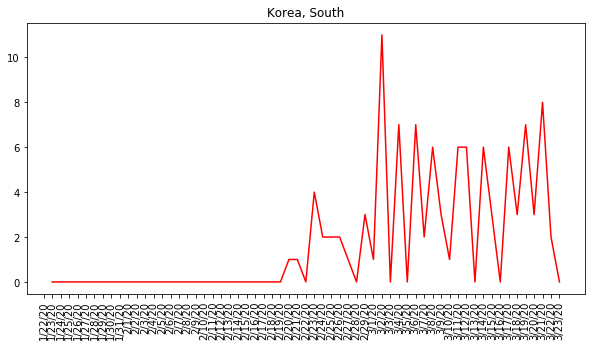

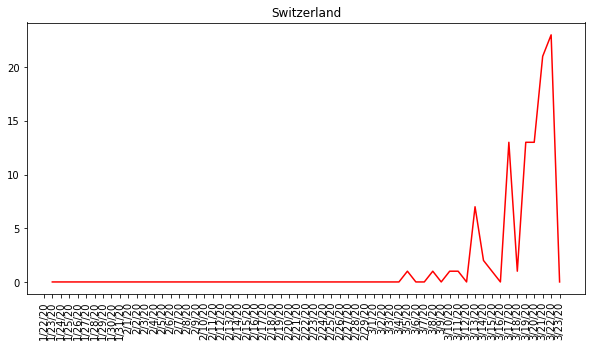

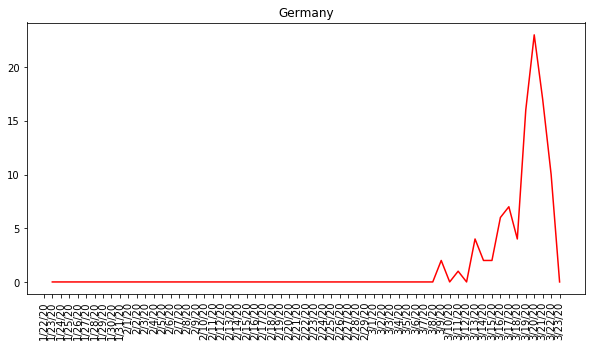

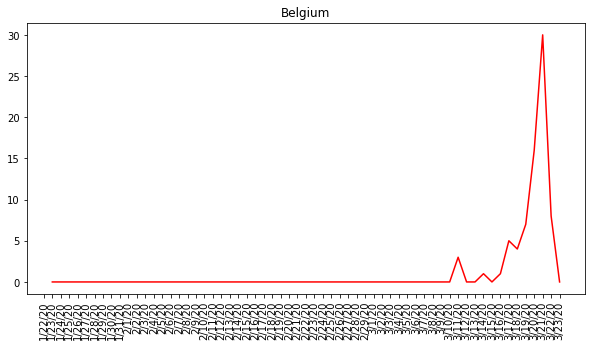

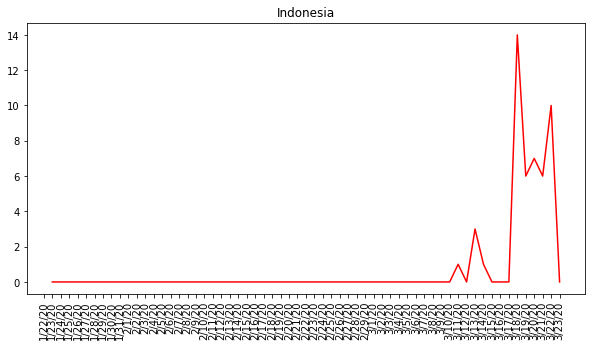

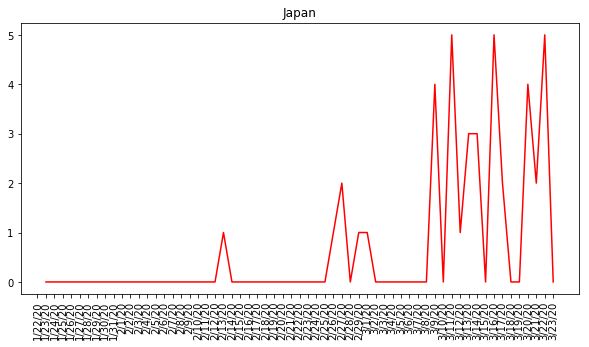

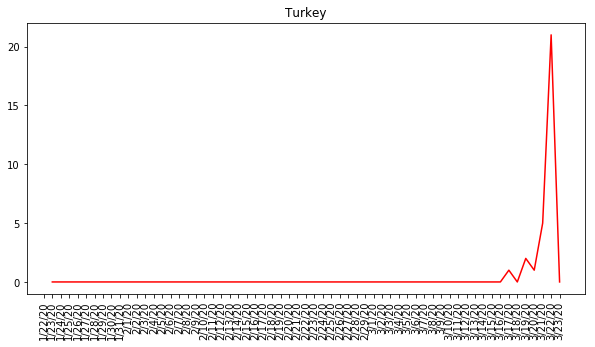

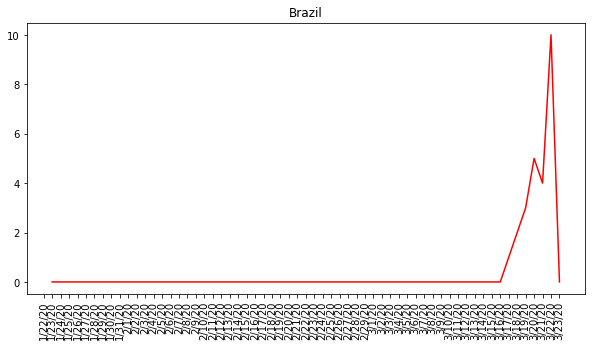

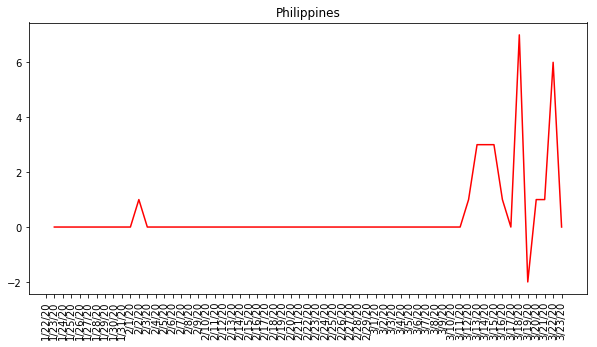

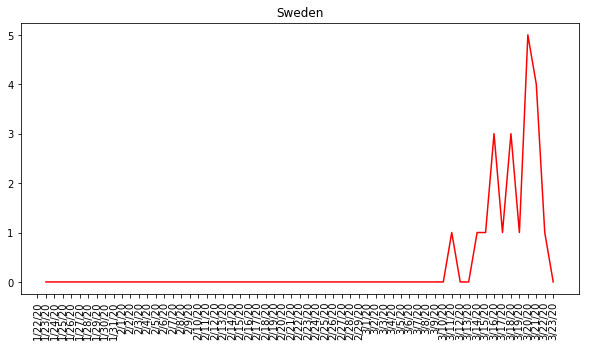

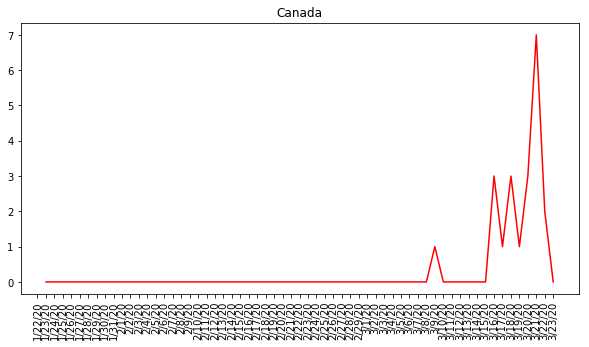

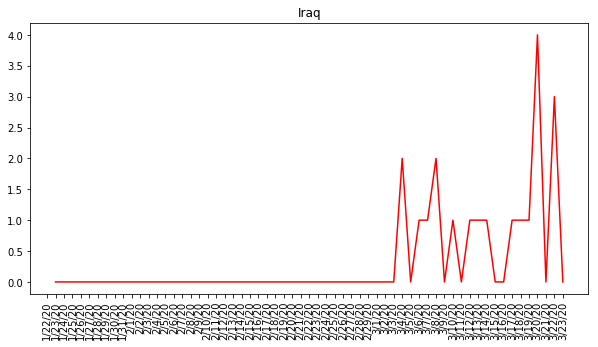

In [50]:
# top20 =['Germany']
for country in top20:
    temp_ = timeser[timeser.index == country]
    temp_ = temp_[temp_.columns[2:]]
    plt.figure(figsize=(10,5))
    plt.plot(temp_.T.diff(), color='r')
    plt.xticks(rotation=90)
    plt.title(country)
#     break

In [63]:
pop_table = pd.read_csv('country_pop_data.csv')

df_20 = pop_table[pop_table['country'].isin(top20)]

In [64]:
df_20['a0-14'] = df_20['population'] * df_20['age 0 to 14']
df_20['a15-64'] = df_20['population'] * df_20['age 15 to 64']
df_20['a65+'] = df_20['population'] * df_20['age over 65']

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [68]:
df_20.sort_values('a65+', ascending=False)

,country,area,population,density,age 0 to 14,age 15 to 64,age over 65,a0-14,a15-64,a65+
34,China,9640821.0,1.401899e+09,145.412873,0.177,0.717,0.106,2.481362e+08,1.005162e+09,1.486013e+08
82,Japan,377975.0,1.260100e+08,333.381837,0.129,0.601,0.270,1.625529e+07,7.573201e+07,3.402270e+07
22,Brazil,8515767.0,2.112970e+08,24.812444,0.217,0.697,0.086,4.585145e+07,1.472740e+08,1.817154e+07
59,Germany,357168.0,8.314930e+07,232.801651,0.131,0.655,0.215,1.089256e+07,5.446279e+07,1.787710e+07
74,Indonesia,1904569.0,2.680746e+08,140.753420,0.274,0.673,0.053,7.345244e+07,1.804142e+08,1.420795e+07
79,Italy,301308.0,6.025282e+07,199.970874,0.135,0.635,0.230,8.134131e+06,3.826054e+07,1.385815e+07
55,France,543965.0,6.706000e+07,123.279990,0.181,0.622,0.197,1.213786e+07,4.171132e+07,1.321082e+07
174,United Kingdom,242910.0,6.643560e+07,273.498827,0.177,0.638,0.185,1.175910e+07,4.238591e+07,1.229059e+07
152,Spain,505990.0,4.693463e+07,92.758023,0.147,0.659,0.194,6.899391e+06,3.092992e+07,9.105319e+06
169,Turkey,783562.0,8.315500e+07,106.124336,0.250,0.669,0.082,2.078875e+07,5.563069e+07,6.818710e+06
